## CEWA 568 Snow Hydrology 
### HW #1
#### Cassie Lumbrazo

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

For this week's homework, we will pretend we are in very controlled laboratory conditions. If you dislike python, these questions can all be answered with pencil, paper, and a calculator, but you may want to use this exercise as a chance to practice your programming skills.

In [2]:
# First, let's consider the basic thermodynamics of heating water, ice, and air, without phase changes.
# The following are defined at 1 atmosphere of pressure.
c_p_water = 4.2   #kJ K-1 kg-1
c_p_ice   = 2.1   #kJ K-1 kg-1
c_p_air   = 1.0   #kJ K-1 kg-1, note that this changes a lot with volume and pressure, we will neglect this for now

# latent heat of fusion for the ice-water transition
L_f = 334 #kJ/kg

# latent heat of vaporization for the water-vapor transition (evaporation)
L_v = 2256 #kJ/kg

# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s = L_f + L_v #kJ/kg

### A. Imagine you have a 1 cubic centimeter block of ice at -10 degrees C and 1 atm of pressure. Calculate the amount of energy required to melt all of the ice. (Note that you will have to warm it to 0 degrees C before you begin melting it.)

In [3]:
# from Problem A. 
delta_t = 10    #units: C
pressure = 1    #units: atm
density = .917  #units: g/cm3, assuming the general density of ice
volume = 1      #units: cm3, cubic centimeter 

# need mass, from volume and assumed density 
mass_g = volume * density #units: g/cm3 * cm3 = g 
mass_kg = mass_g/1000 #units: g / 1000 = kg
print('The total mass: ', mass_kg, 'kg') #units: kg

The total mass:  0.0009170000000000001 kg


In [4]:
# First part, energy required to warm the ice from -10 to 0C
energy_warm_ice = c_p_ice * delta_t * mass_kg
energy_warm_ice #units: kJ

# Second part, energy required to melt all of the ice once it's at 0C
energy_melt_ice = L_f * mass_kg
energy_melt_ice #units: kJ

# Total energy 
energy_total = energy_warm_ice + energy_melt_ice #units: kJ + kJ
energy_total #units: kJ

print('For 1 atm:')
print('In kJ:')
print("Energy to warm the ice to 0C, is ", energy_warm_ice, "KJ + energy to phase change is", energy_melt_ice, "kJ")
print("The Total Energy =", energy_total, "kJ")

print('In J:')
print("Energy to warm the ice to 0C, is ", energy_warm_ice*1000, "J + energy to phase change is", energy_melt_ice*1000, "J")
print("The Total Energy =", energy_total*1000, "J")

For 1 atm:
In kJ:
Energy to warm the ice to 0C, is  0.019257 KJ + energy to phase change is 0.306278 kJ
The Total Energy = 0.325535 kJ
In J:
Energy to warm the ice to 0C, is  19.257 J + energy to phase change is 306.278 J
The Total Energy = 325.535 J


### B. Now, consider that same block of ice at -10 degrees C and 1 atm of pressure. Calculate the amount of energy required to sublimate all of the ice. (Note that you do not need to warm the ice to sublimate it.)

In [5]:
energy_sublimate = mass_kg * L_s #units: kg * kJ/kg
energy_sublimate # kJ

print('For 1 atm:')
print('In kJ:')
print("Energy to sublimate =", energy_sublimate, "kJ")

print('In J:')
print("Energy to sublimate =", energy_sublimate*1000, "J")

For 1 atm:
In kJ:
Energy to sublimate = 2.37503 kJ
In J:
Energy to sublimate = 2375.03 J


### C. Repeat the calculations above, but imagine you are high in the mountains at 0.5 atm of pressure. What changes?

The first law of thermodynamics says that the change in internal energy of a system is equal to the change in energy minus the **work** done to the system. If the **work done by a gas** (i.e., the atmosphere) is reduced, then this reduces the work on the system, and thus, such take less energy to melt the snowpack with less environmental pressure. The same can be said for vaporization. The vapor pressure required to vaporize water at a lower atmospheric pressure is less, thus it should take less energy to vaporize as a whole. 

* The above constants (latent heat of fusion, vap) are given assuming 1 atm. However, these values are dependent on volume and **pressure**. They should decrease with decreasing atmospheric pressure. 

Source for reminding myself of thermodynamics: https://webhome.phy.duke.edu/~rgb/Class/phy51/phy51/node59.html

Thus, to repeat the calculations above for 0.5 atm in the mountains, we need new values for our constants. 

In [6]:
# The following are defined at 0.5 atmosphere of pressure.....
# latent heat of vaporization for the water-vapor transition (evaporation)
L_v_new = 2500.9 #kJ/kg source: https://www.engineeringtoolbox.com/water-properties-d_1573.html?vA=5&units=C#

# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s_new = L_f + L_v_new #kJ/kg

In [7]:
#Repeating all the calculations ______________________________________

# First part, energy required to warm the ice from -10 to 0C
energy_warm_ice = c_p_ice * delta_t * mass_kg
energy_warm_ice #units: kJ

# Second part, energy required to melt all of the ice once it's at 0C
energy_melt_ice = L_f * mass_kg
energy_melt_ice #units: kJ

# Total energy 
energy_total = energy_warm_ice + energy_melt_ice #units: kJ + kJ
energy_total #units: kJ

print('For 0.5 atm:')
print('In kJ:')
print("Energy to warm the ice to 0C, is ", energy_warm_ice, "KJ + energy to phase change is", energy_melt_ice, "kJ")
print("The Total Energy =", energy_total, "kJ")

print('In J:')
print("Energy to warm the ice to 0C, is ", energy_warm_ice*1000, "J + energy to phase change is", energy_melt_ice*1000, "J")
print("The Total Energy =", energy_total*1000, "J")

energy_sublimate_new = mass_kg * L_s_new #units: kg * kJ/kg
energy_sublimate_new # kJ

print('In kJ:')
print("Energy to sublimate =", energy_sublimate_new, "kJ")

print('In J:')
print("Energy to sublimate =", energy_sublimate_new*1000, "J")

For 0.5 atm:
In kJ:
Energy to warm the ice to 0C, is  0.019257 KJ + energy to phase change is 0.306278 kJ
The Total Energy = 0.325535 kJ
In J:
Energy to warm the ice to 0C, is  19.257 J + energy to phase change is 306.278 J
The Total Energy = 325.535 J
In kJ:
Energy to sublimate = 2.5996033 kJ
In J:
Energy to sublimate = 2599.6033 J


In [8]:
print('In kJ:')
print("Energy to sublimate at 0.5atm =", energy_sublimate_new, "kJ")
print("Energy to sublimate at 1.0atm =", energy_sublimate, "kJ")

In kJ:
Energy to sublimate at 0.5atm = 2.5996033 kJ
Energy to sublimate at 1.0atm = 2.37503 kJ


### D. We know that cold snow is primarily a mixture of ice and air. Consider no phase changes and temperatures between -15 degrees and -5 degrees C. Imagine that no interactions occur between the ice and air in the snow matrix. How does the energy required to heat the mixture those 10 degrees change as the fractions of ice vs. air change in the total mixture?

Cold snow is primarily a mixture of ice and air
* Assumptions: consider no phase changes and imagine that no interactions occur between the ice and air in the snow matrix 
* We are increasing the temperature from -15 degrees to -5 degrees C (delta t is 10)

**How does the energy required to heat the mixture change as the fractions of ice vs. air change in the total mixture?** 
* Create a plot, with fractions of ice vs. air on the x-axis and energy on the y-axis. 

In [9]:
delta_t = 10 
df = pd.DataFrame()

# % of air in the snowpack from 0 to 100
df['snowpack_ice'] = np.arange(0,101)
# the % that is air is just what's left over from ice
df['snowpack_air'] = 101 - df['snowpack_ice']  

df['mass_ice'] = df['snowpack_ice'] * mass_kg
df['mass_air'] = df['snowpack_air'] * mass_kg

In [10]:
df['energy_ice'] = c_p_ice * df['mass_ice'] * delta_t
df['energy_air'] = c_p_air * df['mass_air'] * delta_t
df['energy_total'] = df['energy_ice'] + df['energy_air']

In [11]:
df.head()

,snowpack_ice,snowpack_air,mass_ice,mass_air,energy_ice,energy_air,energy_total
0,0,101,0.000000,0.092617,0.000000,0.92617,0.926170
1,1,100,0.000917,0.091700,0.019257,0.91700,0.936257
2,2,99,0.001834,0.090783,0.038514,0.90783,0.946344
3,3,98,0.002751,0.089866,0.057771,0.89866,0.956431
4,4,97,0.003668,0.088949,0.077028,0.88949,0.966518


Text(0, 0.5, 'energy kJ')

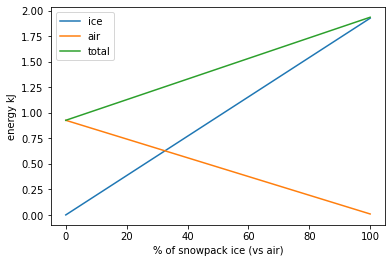

In [12]:
plt.plot(df.snowpack_ice, df.energy_ice)
plt.plot(df.snowpack_ice, df.energy_air)
plt.plot(df.snowpack_ice, df.energy_total)

plt.legend(['ice', 'air', 'total'])
plt.xlabel('% of snowpack ice (vs air)')
plt.ylabel('energy kJ')

### E. I argue that sublimation saves the snowpack more than it reduces it. Why would I say this? Do you agree or disagree? Use the specific and latent heats in lab 1-2 to make your argument.

Sublimation is the **phase change** between the ice to vapor. This phase change requires a lot of energy
* You can see from Problem A that the energy to warm the ice was only 18 J compared to the energy to produce a phase change and melt all the ice, was about 300 J
* This is also clear from the values for the latent heat of "sublimation" which is the latent heat of fusion *ice to water* + the latent heat of vaporization *water to vapor*. 

When sublimation occurs, there is certainly a loss of solid mass from the snowpack. This is not saving the snowpack. 

However, there is also a loss of energy from that phase change. This loss of energy translates to a loss of heat which reduces the temperature of the snowpack. If the temperature of the snowpack is reduced, then we are "saving" the snowpack by causing it to last longer at a colder temperature (i.e., *increasing delta-t in our equation which requires more energy to melt the snowpack*). 